# Clustering Using Pycaret

# Installing Pycaret Library

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 452.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.2 MB/s eta 0

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Kaggle's Electric Vehicle Population Dataset - https://www.kaggle.com/datasets/ratikkakkar/electric-vehicle-population-data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DM-Assignment-Dataset/Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23.0,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26.0,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36.0,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,SADHC2S1XK,Thurston,Olympia,WA,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2.0,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21.0,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,KNAGV4LD6L,Clark,Vancouver,WA,98686.0,2020,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,28,0,17.0,122272881,POINT (-122.64839529999995 45.70104270000007),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
138775,7SAYGDEE1N,Thurston,Lacey,WA,98503.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,187390038,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
138776,5YJYGDEE7M,Benton,Richland,WA,99352.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,181300416,POINT (-119.29441499999996 46.27187500000008),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10
138777,WBY33AW08P,Pierce,Tacoma,WA,98443.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,25.0,224612055,POINT (-122.36463499999996 47.19449000000003),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


# Model Build Using Pycaret

In [ ]:
# import pycaret clustering and init setup
from pycaret.clustering import *
cluster_setup= setup(df, session_id = 1234)

In [ ]:
# check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9944,372517.2270,0.2339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Cluster
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,23.0,214384896.0,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10,Cluster 0
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,26.0,271008640.0,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10,Cluster 0
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,36.0,8781552.0,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Cluster 0
3,SADHC2S1XK,Thurston,Olympia,WA,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234.0,0.0,2.0,8308492.0,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10,Cluster 0
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,21.0,245524528.0,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16494,KNDCC3LG5N,King,Renton,WA,98057.0,2022,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,11.0,171365184.0,POINT (-122.21024 47.4797047),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Cluster 0
16495,1G1FX6S01H,King,Seattle,WA,98101.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,43.0,249766992.0,POINT (-122.33534499999996 47.610790000000065),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Cluster 0
16496,5YJSA1CG3D,King,Snoqualmie,WA,98065.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,5.0,957694.0,POINT (-121.87404959999998 47.534554600000035),CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP,5.303303e+10,Cluster 0
16497,5YJYGDEE3M,King,Kirkland,WA,98034.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,182436816.0,POINT (-122.20928499999997 47.71124000000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,Cluster 0


# Visualisation

In [ ]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

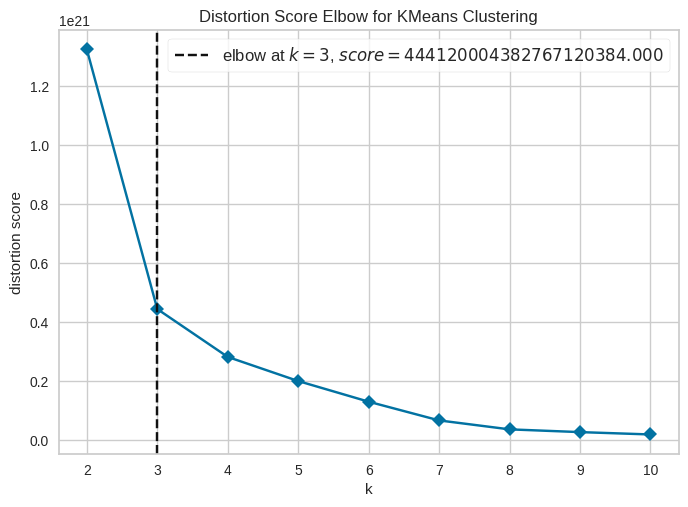

In [ ]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

# Analyse The Model

In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Saving the Model

In [ ]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Postal Code', 'Model Year',
                                              'Electric Range', 'Base MSRP',
                                              'Legislative District',
                                              'DOL Vehicle ID',
                                              '2020 Census Tract'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['VIN (1-10)', 'County', 'City',
                                              'State', 'Make', 'Model',
                                              'Elec...
                                              'Clean Alternative Fuel Vehicle '
                                              '(CAFV) Eligibility',
                                              'Vehicle Location',
                            

# Loading The Model

In [ ]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Postal Code', 'Model Year',
                                             'Electric Range', 'Base MSRP',
                                             'Legislative District',
                                             'DOL Vehicle ID',
                                             '2020 Census Tract'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['VIN (1-10)', 'County', 'City',
                                             'State', 'Make', 'Model',
                                             'Elec...
                                             'Clean Alternative Fuel Vehicle '
                                             '(CAFV) Eligibility',
                                             'Vehicle Location',
                                             'Electric Utility'],
                                    transformer=OneHotEncoder(cols=['VIN '
                                                                    '(1-10)',
                                                                    'County',
                                                                    'City',
                                                                    'State',
                                                                    'Make',
                                                                    'Model',
                                                                    'Clean '
                                                                    'Alternative '
                                                                    'Fuel '
                                                                    'Vehicle '
                                                                    '(CAFV) '
                                                                    'Eligibility',
                                                                    'Vehicle '
                                                                    'Location',
                                                                    'Electric '
                                                                    'Utility'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=1234))])